<h1>Analysis on Diabetic Patients based on health attributes</h1>

In this jupyter notebook, we will be analyzing data of diabetic and non diabetic patients. Diabetes is a prevalent chronic condition affecting millions of individuals worldwide. Understanding the factors contributing to diabetes and developing accurate predictive models are crucial for effective management and intervention strategies. We will explore a dataset containing various attributes related to diabetes, such as glucose levels, pregnancies, bmi, and more.

We will begin by importing and briefly overviewing the data. We will continue with exploratory data analysis. We will begin by conducting a thorough exploration of the dataset to gain insights into the distribution, relationships, and potential patterns among different variables. EDA is essential for understanding the structure of the data and identifying any anomalies or trends that may influence model performance.

After exploring the data, we will be developing and comparing two approaches: deep learning and regression, and compare the results of both.

<h3>Importing Libraries</h3>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, BatchNormalization, MaxPooling1D, MaxPooling2D, TimeDistributed,Dropout

from keras import optimizers

EPOCH = 100
batch_size = 32

<h3>Reading the Data</h3>

In [2]:
#reading both train and test data
diabetes_train_df = pd.read_csv('Training.csv')
diabetes_test_df = pd.read_csv('Testing.csv')

In [3]:
diabetes_train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#information on overall dataset
diabetes_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


<h3>EDA: Exploratory Data Analysis</h3>

<h5>Univariate Analysis</h5>

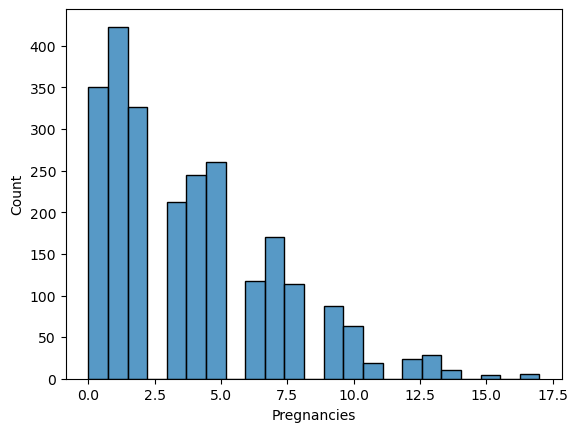

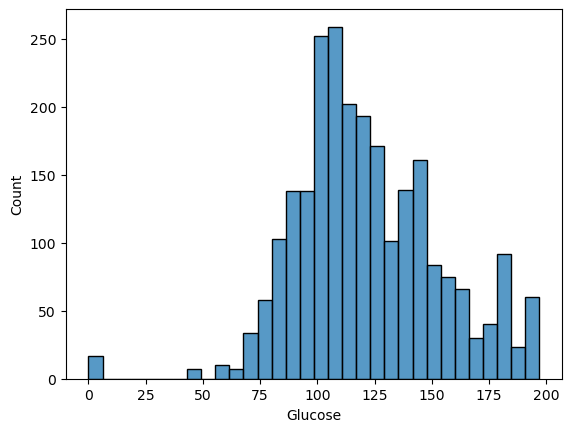

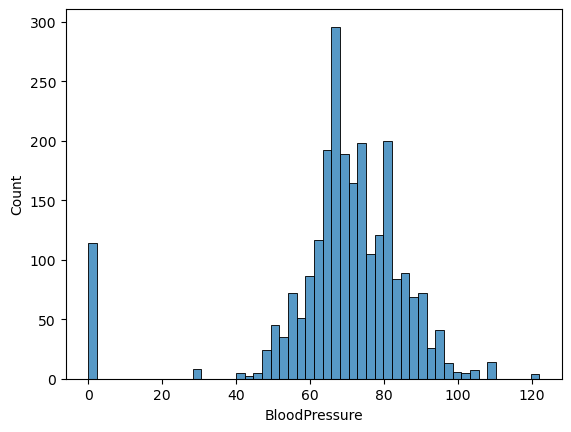

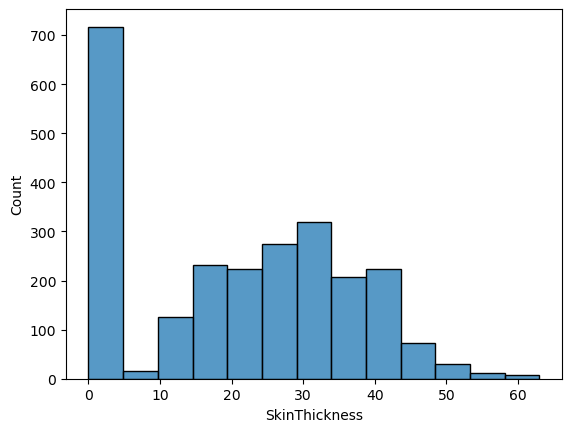

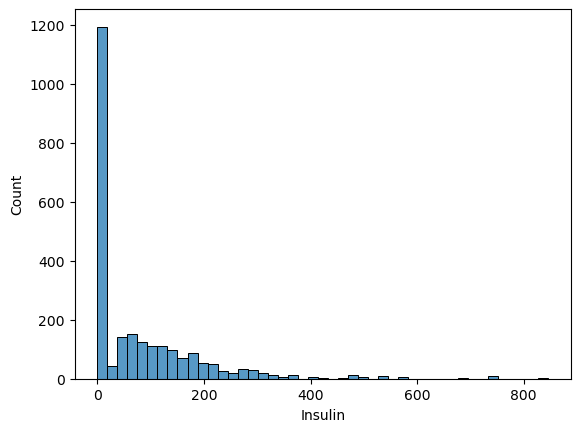

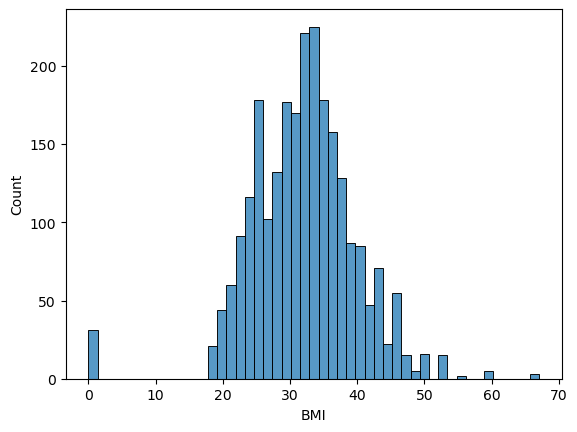

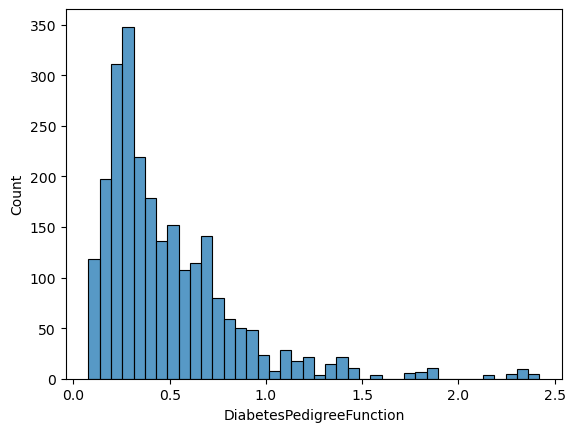

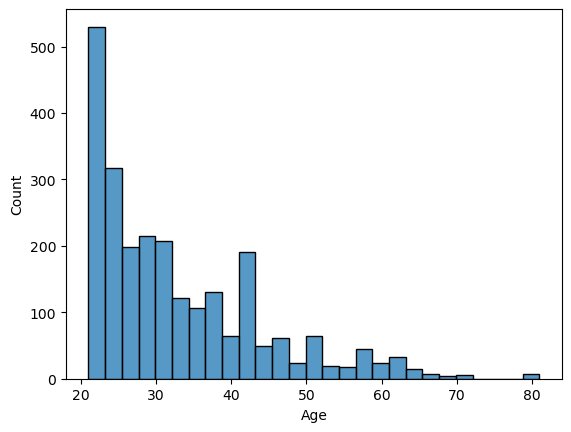

In [10]:
#List out all the numerical columns (all of them)
num_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

#Create histograms of each
for col in num_columns:
    sns.histplot(data = diabetes_train_df, x = col)
    plt.show()

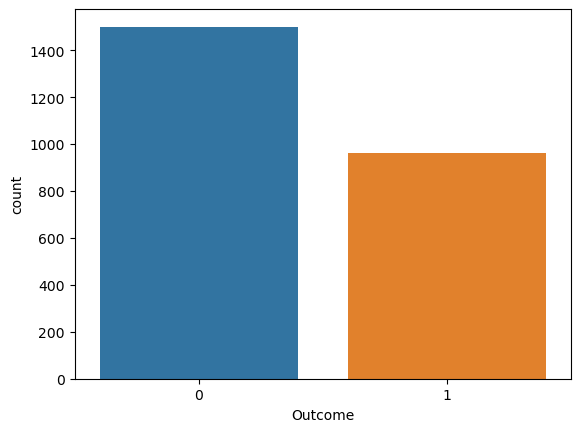

In [11]:
#Overall comparison of the Outcome 
sns.countplot(diabetes_train_df, x="Outcome")
plt.show()

<h5>Bivariate Analysis</h5>

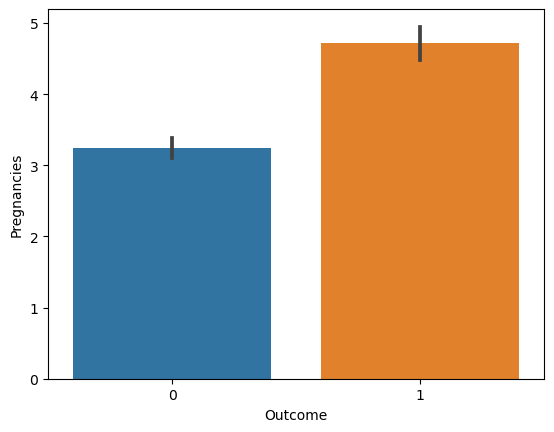

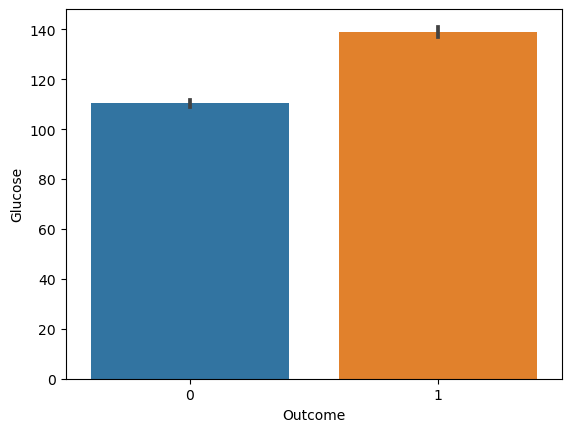

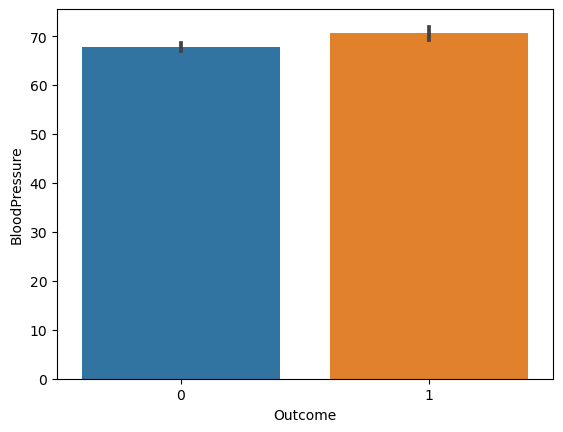

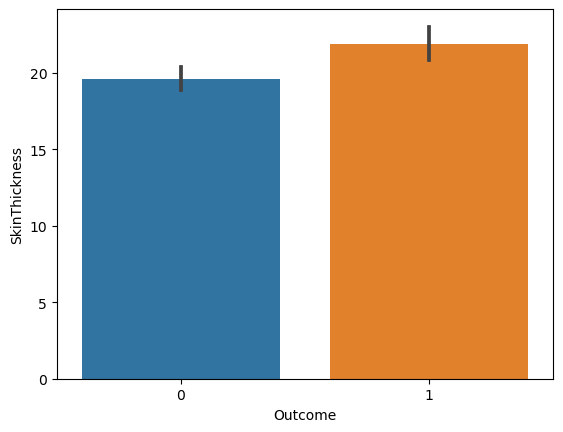

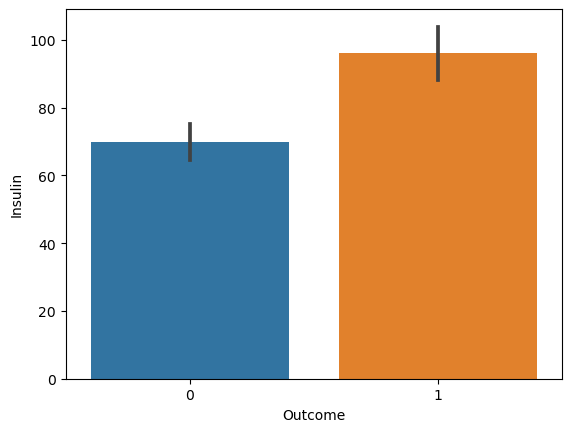

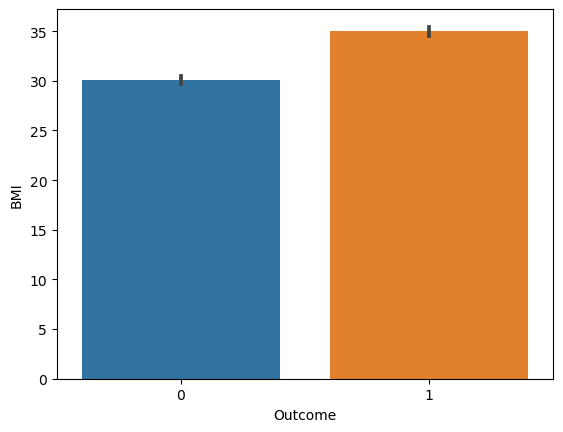

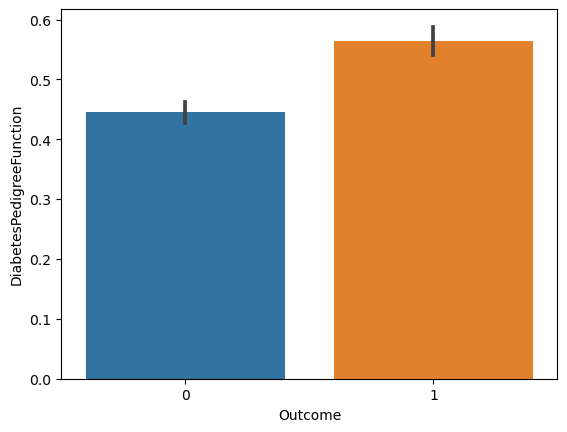

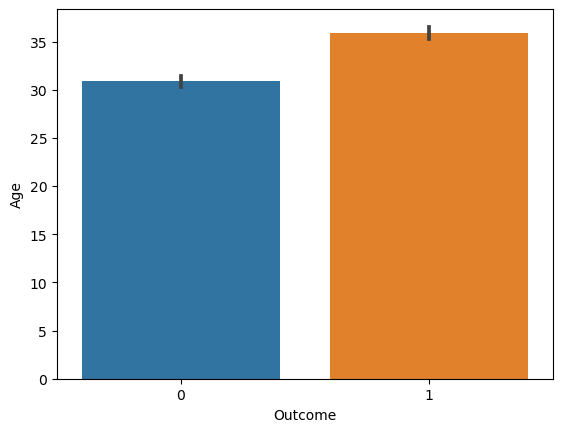

In [12]:
for col in num_columns:
    sns.barplot(data = diabetes_train_df, x = 'Outcome', y = col)
    plt.show()

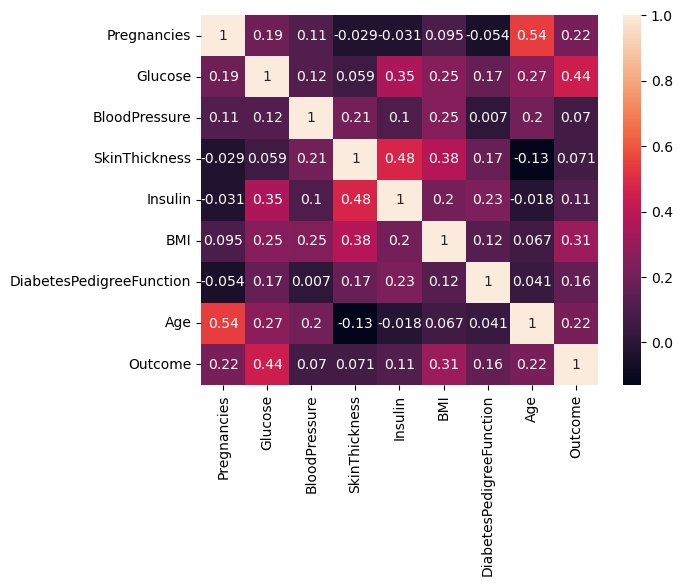

In [13]:
#Lets find the correlation
diabetes_corr = diabetes_train_df.corr()
sns.heatmap(diabetes_corr, annot=True)
plt.show()

<h3>Data Preprocessing</h3>

We will split our data between training and validation (test).

In [14]:
#Lets split our data with X and Y values
X = diabetes_train_df.drop(columns = ['Outcome'])
Y = diabetes_train_df['Outcome']

In [15]:
#Split Data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, shuffle = False)

In [20]:
#Stats of our data
stats = X_train.describe()
stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000
mean,3.828184,121.238482,68.823848,20.439566,77.436856,32.060921,0.485595,32.779946
std,3.284795,31.945241,19.087732,15.726384,115.763344,7.749139,0.356510,11.273677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.000000,0.249000,24.000000
50%,3.000000,117.000000,70.000000,23.000000,29.000000,32.000000,0.374000,29.000000
75%,6.000000,142.000000,80.000000,33.000000,120.000000,36.600000,0.652000,39.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [21]:
#Transpose so that we can normalize based on mean and std
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1845.0,3.828184,3.284795,0.000,1.000,3.000,6.000,17.00
Glucose,1845.0,121.238482,31.945241,0.000,100.000,117.000,142.000,197.00
BloodPressure,1845.0,68.823848,19.087732,0.000,64.000,70.000,80.000,122.00
SkinThickness,1845.0,20.439566,15.726384,0.000,0.000,23.000,33.000,63.00
Insulin,1845.0,77.436856,115.763344,0.000,0.000,29.000,120.000,846.00
BMI,1845.0,32.060921,7.749139,0.000,27.000,32.000,36.600,67.10
DiabetesPedigreeFunction,1845.0,0.485595,0.356510,0.078,0.249,0.374,0.652,2.42
Age,1845.0,32.779946,11.273677,21.000,24.000,29.000,39.000,81.00


For our models, we will need to normalize the dataset so that the numbers between the different columns are adjusted as initially equal weights.

In [22]:
def norm(x):
    return (x - stats['mean'] / stats['std'])
norm_X_train = norm(X_train)
norm_X_test = norm(X_test)

<h3>Model Building: NN</h3>

In [35]:
# Define the RNN model
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=norm_X_train.shape[1]))  # Output layer for binary classification
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'mape'])
# Train the model
model_history = model.fit(norm_X_train, y_train, epochs=15, steps_per_epoch=50)

# Evaluate the model
loss, mae, mse, mape = model.evaluate(norm_X_test, y_test)
print("Mae:", mae)
print("Mape:", mape)
print("Mse:", mse)

Epoch 1/15
50/50 [==============================] - 1s 1ms/step - loss: 0.3954 - mae: 0.4067 - mse: 0.3954 - mape: 42940464.0000
Epoch 2/15
50/50 [==============================] - 0s 983us/step - loss: 0.3886 - mae: 0.3888 - mse: 0.3886 - mape: 157388.9688
Epoch 3/15
50/50 [==============================] - 0s 895us/step - loss: 0.3695 - mae: 0.4102 - mse: 0.3695 - mape: 47596364.0000
Epoch 4/15
50/50 [==============================] - 0s 1ms/step - loss: 0.2647 - mae: 0.4098 - mse: 0.2647 - mape: 199199920.0000
Epoch 5/15
50/50 [==============================] - 0s 929us/step - loss: 0.2425 - mae: 0.3969 - mse: 0.2425 - mape: 190401008.0000
Epoch 6/15
50/50 [==============================] - 0s 882us/step - loss: 0.2472 - mae: 0.3857 - mse: 0.2472 - mape: 182071504.0000
Epoch 7/15
50/50 [==============================] - 0s 948us/step - loss: 0.2131 - mae: 0.3772 - mse: 0.2131 - mape: 191320064.0000
Epoch 8/15
50/50 [==============================] - 0s 848us/step - loss: 0.2286 - ma

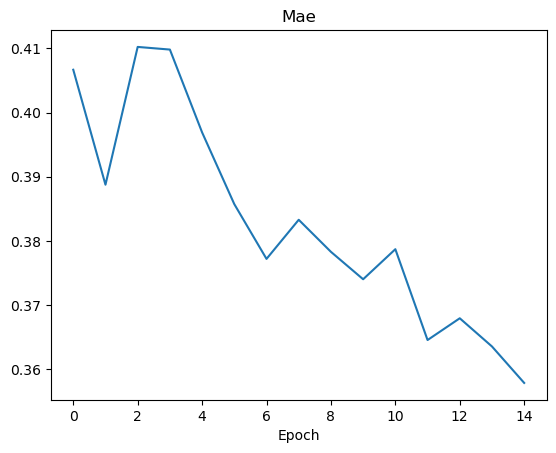

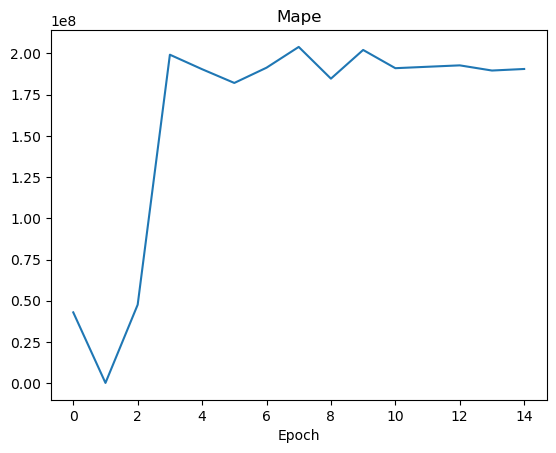

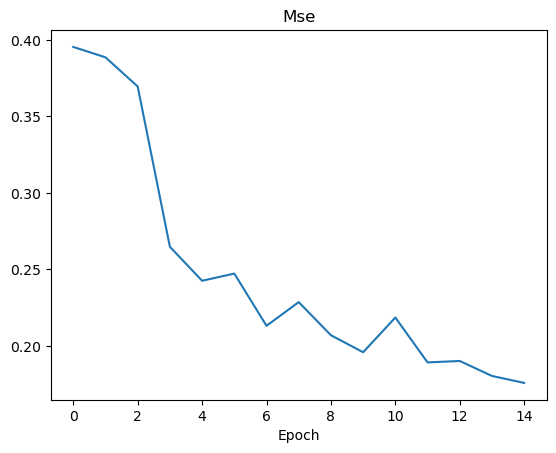

In [38]:
#Ploting accuracy Graph
plt.plot(model_history.history['mae'])
plt.title('Mae')
plt.xlabel('Epoch')
plt.show()
#Ploting accuracy Graph
plt.plot(model_history.history['mape'])
plt.title('Mape')
plt.xlabel('Epoch')
plt.show()
#Ploting accuracy Graph
plt.plot(model_history.history['mse'])
plt.title('Mse')
plt.xlabel('Epoch')
plt.show()

In [58]:
#predictions of our validation set
pred = model.predict(X_test)

#process the sigmoid output of our output layers into 0 and 1 segmentation
pred = [int(x > .5) for x in pred]

#printing the first 5 models
print("First 10 outputs of train and test")
print(pred[:10])
print(y_test[:10].tolist())
print()
#printing accuracy
acc = accuracy_score(pred, y_test)
print("Accuracy : " + str(acc))

20/20 [==============================] - 0s 764us/step
First 10 outputs of train and test
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

Accuracy : 0.7252032520325203


In [59]:
con_matrix_Log = confusion_matrix(y_test, pred)
print('Confusion Matrix:')
print(con_matrix_Log)

Confusion Matrix:
[[293  79]
 [ 90 153]]


<h5>Optimizing our NN</h5>

In [42]:
# Define the RNN model
model_opt = Sequential()
model_opt.add(Dense(units=32,activation='relu',input_dim=norm_X_train.shape[1]))  # Output layer for binary classification
model_opt.add(Dropout(0.2))
model_opt.add(BatchNormalization()) 
model_opt.add(Dense(units=64,activation='relu'))
model_opt.add(Dropout(0.2))
model_opt.add(BatchNormalization()) 
model_opt.add(Dense(units=32,activation='relu'))
model_opt.add(Dropout(0.2))
model_opt.add(BatchNormalization()) 
model_opt.add(Dense(units=32,activation='relu'))
model_opt.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_opt.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'mape'])
# Learning Rate
lr = .001

optimizer = optimizers.RMSprop(lr)
# Train the model
model_opt_history = model_opt.fit(norm_X_train, y_train, epochs=EPOCH, batch_size = batch_size, steps_per_epoch=int(X_train.shape[0]/batch_size), shuffle=True)

# Evaluate the model
loss, mae, mse, mape = model_opt.evaluate(norm_X_test, y_test)
print("Mae:", mae)
print("Mape:", mape)
print("Mse:", mse)

Epoch 1/100
57/57 [==============================] - 2s 2ms/step - loss: 0.2667 - mae: 0.4788 - mse: 0.2667 - mape: 327524352.0000
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2116 - mae: 0.4134 - mse: 0.2116 - mape: 219633264.0000
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2091 - mae: 0.4001 - mse: 0.2091 - mape: 207470000.0000
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2062 - mae: 0.3972 - mse: 0.2062 - mape: 197714176.0000
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2000 - mae: 0.3933 - mse: 0.2000 - mape: 197245920.0000
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1978 - mae: 0.3845 - mse: 0.1978 - mape: 189777216.0000
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1909 - mae: 0.3751 - mse: 0.1909 - mape: 190310112.0000
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2018 - m

57/57 [==============================] - 0s 2ms/step - loss: 0.1668 - mae: 0.3354 - mse: 0.1668 - mape: 167792960.0000
Epoch 64/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1708 - mae: 0.3411 - mse: 0.1708 - mape: 171311856.0000
Epoch 65/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1731 - mae: 0.3427 - mse: 0.1731 - mape: 169828848.0000
Epoch 66/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1672 - mae: 0.3387 - mse: 0.1672 - mape: 171005280.0000
Epoch 67/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1705 - mae: 0.3354 - mse: 0.1705 - mape: 162857904.0000
Epoch 68/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1678 - mae: 0.3368 - mse: 0.1678 - mape: 171015888.0000
Epoch 69/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1620 - mae: 0.3269 - mse: 0.1620 - mape: 167886944.0000
Epoch 70/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1715 - mae: 0

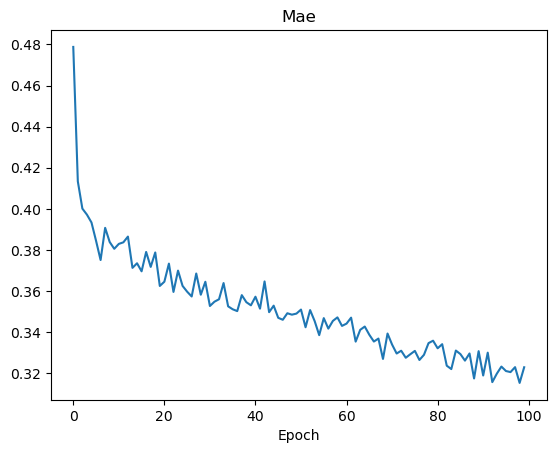

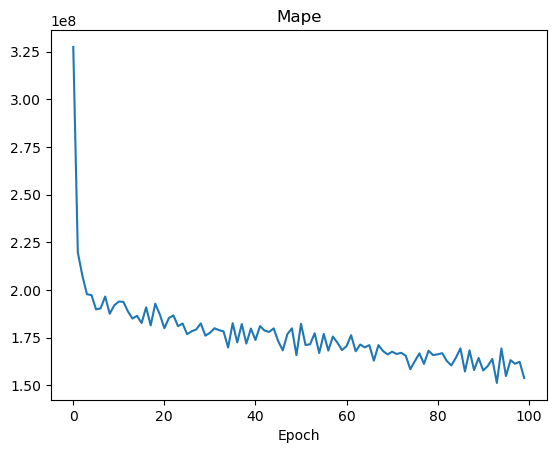

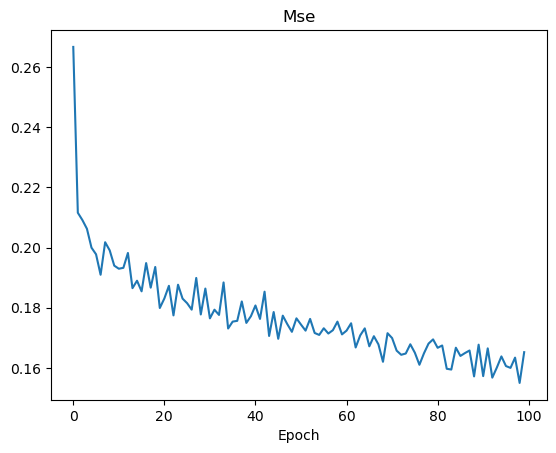

In [43]:
#Ploting accuracy Graph
plt.plot(model_opt_history.history['mae'])
plt.title('Mae')
plt.xlabel('Epoch')
plt.show()
#Ploting accuracy Graph
plt.plot(model_opt_history.history['mape'])
plt.title('Mape')
plt.xlabel('Epoch')
plt.show()
#Ploting accuracy Graph
plt.plot(model_opt_history.history['mse'])
plt.title('Mse')
plt.xlabel('Epoch')
plt.show()

In [56]:
#predictions of our validation set
pred = model_opt.predict(X_test)

#process the sigmoid output of our output layers into 0 and 1 segmentation
pred = [int(x > .5) for x in pred]

#printing the first 5 models
print("First 10 outputs of train and test")
print(pred[:10])
print(y_test[:10].tolist())
print()
#printing accuracy
acc = accuracy_score(pred, y_test)
print("Accuracy : " + str(acc))

20/20 [==============================] - 0s 949us/step
First 10 outputs of train and test
[1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

Accuracy : 0.7317073170731707


In [57]:
con_matrix_Log = confusion_matrix(y_test, pred)
print('Confusion Matrix:')
print(con_matrix_Log)

Confusion Matrix:
[[240 132]
 [ 33 210]]


<h3>Model Building: Regression</h3>

In [52]:
#building logistical regression model using SKlearn
model_Log = LogisticRegression(solver = 'liblinear').fit(norm_X_train, y_train)
y_train_pred = model_Log.predict(norm_X_train)
y_test_pred = model_Log.predict(norm_X_test)

In [54]:
#printing out accuracy score
acc_train_Log = accuracy_score(y_train, y_train_pred)
acc_test_Log = accuracy_score(y_test, y_test_pred)

con_matrix_Log = confusion_matrix(y_test, y_test_pred)


print('Accuracy score for training data: ' + str(acc_train_Log))
print('Accuracy score for testing data: ' + str(acc_test_Log))
print('Confusion Matrix:')
print(con_matrix_Log)

print('Model coefficients')
print(model_Log.coef_)

Accuracy score for training data: 0.7398373983739838
Accuracy score for testing data: 0.7430894308943089
Confusion Matrix:
[[320  52]
 [106 137]]
Model coefficients
[[ 0.09297489  0.02961953 -0.00827581 -0.00182286 -0.00187549  0.07926419
   0.86835716  0.0037801 ]]


<h3>Model Comparison and Conclusion</h3>

After conducting a comprehensive analysis of the dataset and developing predictive models using both neural network (NN) and logistic regression techniques, the neural network model achieved 72% accuracy and the regression model demonstrated a 73% accuracy. The performance of the logistic regression model was ever so slightly better than that of the neural network across the evaluated metrics. Factors such as dataset size, feature complexity, and computational resources may have influenced the performance of the models. Further optimization and fine-tuning of model hyperparameters may lead to improved performance for both approaches.

Overall, the comparison between the neural network and logistic regression models highlights the importance of considering various factors, including model complexity and interpretability, in choosing the most suitable predictive modeling technique for a given dataset and problem domain.